# AI-Generated Content Detection
# Gillian Tatreau

### Load libraries

In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import warnings

In [2]:
warnings.filterwarnings("ignore")

### Load data

In [3]:
# load data
df = pd.read_csv("/Users/gillian/Documents/Bellevue Grad Program/Winter 2023-24/Project 3/AI_Human.csv")
# display first 5 rows
df.head()

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


### EDA

In [4]:
# display data types
df.dtypes

text          object
generated    float64
dtype: object

In [5]:
# number of texts in df
len(df)

487235

In [6]:
# number of human generated texts
len(df[df['generated'] == 0])

305797

In [7]:
# number of AI generated texts
len(df[df['generated'] == 1])

181438

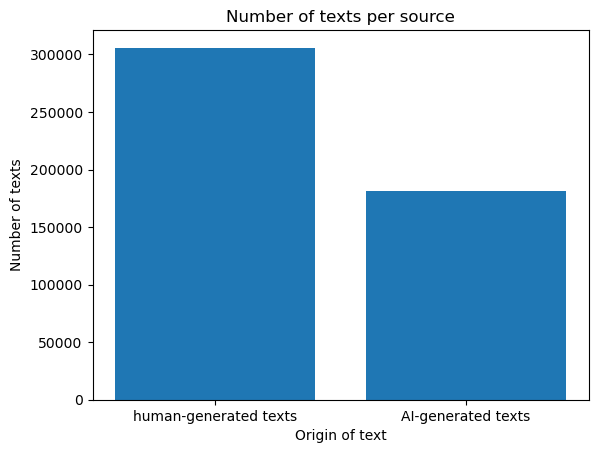

In [8]:
# dictionary for barplot
bar = {'human-generated texts': 305797, 'AI-generated texts': 181438}

# bar plot
plt.bar(list(bar.keys()), list(bar.values())) 
plt.xlabel("Origin of text")
plt.ylabel("Number of texts")
plt.title("Number of texts per source")
# plt.savefig("barplot.png")
plt.show()

##### Remove rows where text does not contain a period

In [9]:
texts = df['text']

In [10]:
# empty list
empty_text = []
# iterate over every row of text
for text in texts:
    # count number of periods
    empty = text.count('.')
    empty_text.append(empty)

In [11]:
# add column empty_list to df
df['empty_text'] = empty_text
# subset of df where all rows have no periods
text_empty = df[df['empty_text'] < 1]
# length of subset
len(text_empty)

372

In [12]:
# number of rows of AI generated text without periods
len(text_empty[text_empty['generated'] == 1])

79

In [13]:
# number of rows of human generated text without periods
len(text_empty[text_empty['generated'] == 0])

293

In [14]:
# remove rows without periods
df1 = df.drop(text_empty.index)

#### Number of words per sentence, number of sentences per text

In [15]:
# text from first entry
s = df1['text'][0]
# list of number of words per sentence
parts = [len(l.split()) for l in re.split(r'[?!.]', s) if l.strip()]
# prints average words per sentence for text entry
print(sum(parts)/len(parts))

24.375


In [16]:
entries = df1['text']

In [17]:
# empty list
words_per_sent = []
num_sent = []
# iterate over all rows
for entrie in entries:
    parts = [len(l.split()) for l in re.split(r'[?!.]', entrie) if l.strip()]
    word_sent = (sum(parts)/len(parts))
    words_per_sent.append(word_sent)
    num_sent.append(len(parts))

In [18]:
# add words_per_sentence column
df1['words_per_sentence'] = words_per_sent
# add number_sentences column
df1['number_sentences'] = num_sent
# drop empty_text column
df1 = df1.drop(['empty_text'], axis = 1)

In [19]:
# first 5 rows of df
df1.head()

,text,generated,words_per_sentence,number_sentences
0,Cars. Cars have been around since they became ...,0.0,24.375000,24
1,Transportation is a large necessity in most co...,0.0,17.111111,27
2,"""America's love affair with it's vehicles seem...",0.0,15.500000,48
3,How often do you ride in a car? Do you drive a...,0.0,13.607843,51
4,Cars are a wonderful thing. They are perhaps o...,0.0,17.117647,51


In [20]:
# summary statistics of words_per_sentence
df1['words_per_sentence'].describe()

count    486863.000000
mean         20.363180
std          10.393982
min           1.250000
25%          16.300000
50%          19.103448
75%          22.260870
max         727.000000
Name: words_per_sentence, dtype: float64

In [21]:
# summary statistics for number_sentences
df1['number_sentences'].describe()

count    486863.000000
mean         20.676051
std           9.189953
min           1.000000
25%          14.000000
50%          20.000000
75%          26.000000
max         155.000000
Name: number_sentences, dtype: float64

#### Distribution of words_per_sentence variable

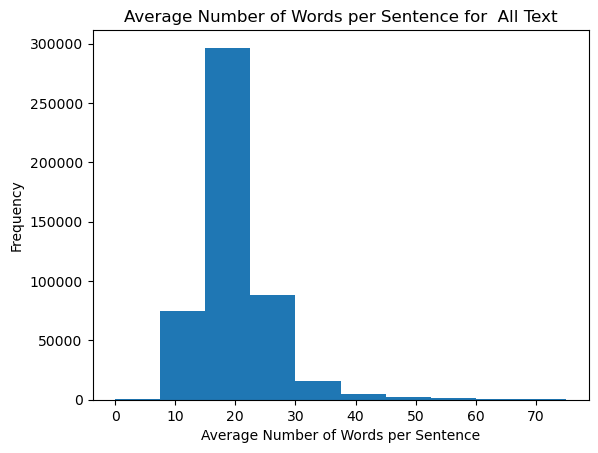

In [22]:
# histogram of words_per_sentence
plt.hist(df1['words_per_sentence'], range = (0,75))
plt.xlabel('Average Number of Words per Sentence')
plt.ylabel('Frequency')
plt.title('Average Number of Words per Sentence for  All Text')
# plt.savefig("hist-words_per_sent.png")
plt.show()

In [23]:
# dataframes for each origin
human = df1[df1['generated'] == 0]
ai = df1[df1['generated'] == 1]

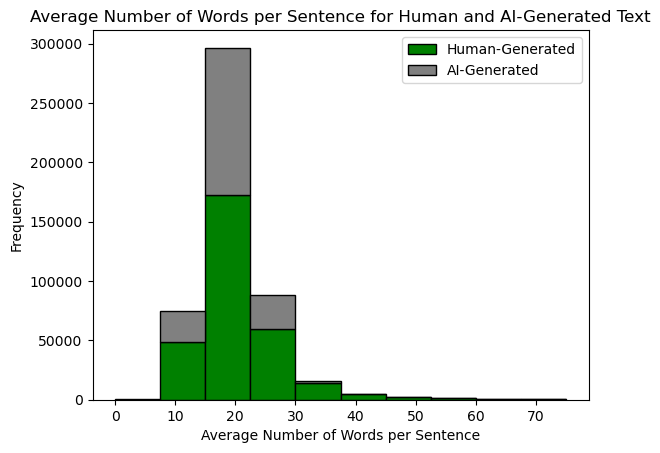

In [24]:
# histogram of words_per_sentence, with differentiation between origin sources
plt.hist([human['words_per_sentence'], ai['words_per_sentence']], range = (0,75), stacked=True, color=['green', 'grey'], edgecolor='black')
plt.xlabel('Average Number of Words per Sentence')
plt.ylabel('Frequency')
plt.title('Average Number of Words per Sentence for Human and AI-Generated Text')
plt.legend(['Human-Generated', 'AI-Generated'])
# plt.savefig("hist_words_per_sent_diff.png")
plt.show()

#### Distribution of number_sentences variable

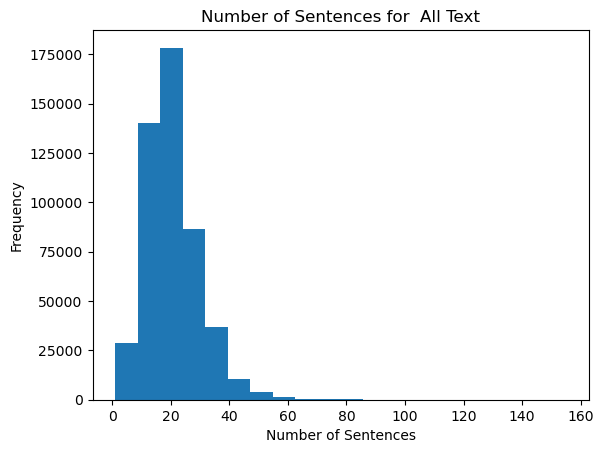

In [25]:
# histogram of number_sentences
plt.hist(df1['number_sentences'], bins = 20)
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.title('Number of Sentences for  All Text')
# plt.savefig("hist_num_sent.png")
plt.show()

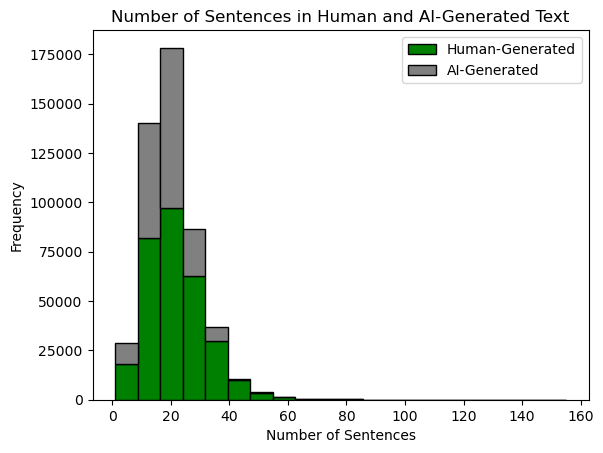

In [26]:
# histogram of number_sentences, with differentiation between origin sources
plt.hist([human['number_sentences'], ai['number_sentences']], bins = 20, stacked=True, color=['green', 'grey'], edgecolor='black')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.title('Number of Sentences in Human and AI-Generated Text')
plt.legend(['Human-Generated', 'AI-Generated'])
# plt.savefig("hist_num_sent_diff.png")
plt.show()

### Models based on Sentence Length and Variation

#### Load Libraries

In [27]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from scipy.stats import randint

#### Split Test/Train Data

In [28]:
x = df1[['words_per_sentence', 'number_sentences']]
y = df1["generated"]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, train_size = 0.80)

#### Standardize data

In [29]:
# instance of the StandardScaler
sc = StandardScaler()
# fit the scaler to the data
x_train_norm = sc.fit_transform(x_train)
# transform the data using the scaler
x_test_norm = sc.transform(x_test)

#### Baseline Dummy Classifier Model

In [30]:
# create baseline model using dummy classifier
dummy = DummyClassifier()
# train dummy model
dummy.fit(x_train_norm, y_train)
# get accuracy score
dummy.score(x_test_norm, y_test)

0.6260359647951691

#### Logistic Regression

In [31]:
# logistic regression model
logreg = LogisticRegression().fit(x_train_norm, y_train)

In [32]:
# accuracy on train data
print("Train Score:", logreg.score(x_train_norm, y_train))
# accuracy on test data
print("Test Score:", logreg.score(x_test_norm, y_test))

Train Score: 0.5984441192328429
Test Score: 0.5963665492487651


#### Naive Bayes

In [33]:
# train naive bayes model
nb = GaussianNB().fit(x_train_norm, y_train)

In [34]:
# accuracy on train data
print("Train Score:", nb.score(x_train_norm, y_train))
# accuracy on test data
print("Test Score:", nb.score(x_test_norm, y_test))

Train Score: 0.5648026906980924
Test Score: 0.5639448307025562


#### Random Forest

In [35]:
# train random forest model
rf = RandomForestClassifier().fit(x_train_norm, y_train)

In [36]:
# accuracy on train data
print("Train Score:", rf.score(x_train_norm, y_train))
# accuracy on test data
print("Test Score:", rf.score(x_test_norm, y_test))

Train Score: 0.7211070887570926
Test Score: 0.7022275168681257


#### Support Vector Machine

In [37]:
# reduced number of rows to decrease training time
x_train_svc = x_train_norm[:80000]
y_train_svc = y_train[:80000]
x_test_svc = x_test_norm[:20000]
y_test_svc = y_test[:20000]

In [38]:
# train svc model
svc = SVC(random_state=101).fit(x_train_svc, y_train_svc)

In [39]:
# accuracy on train data
print("Train Score:", svc.score(x_train_svc, y_train_svc))
# accuracy on test data
print("Test Score:", svc.score(x_test_svc, y_test_svc))

Train Score: 0.6697875
Test Score: 0.6662


Takes 1 hour to train 200,000 rows of data for 67% accuracy. Takes 15 minutes to train 100,000 rows for approximate same accuracy. Focus on Random forest classifier for sentence variety model.

#### Hyperparameter Tuning for Random Forest Classifier

In [40]:
# dictionary of hyperparameters for tuning
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}
# create instance of random forest classifier
rf = RandomForestClassifier()
# find best hyperparameters
rand_search = RandomizedSearchCV(rf, param_distributions = param_dist, n_iter=5, cv=5)

In [41]:
# fit random search object
rand_search.fit(x_train_norm, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fbab7c0d0d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fbab70d4820>})

In [42]:
# best model
best_rf = rand_search.best_estimator_
# best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 16, 'n_estimators': 80}


In [43]:
# accuracy on train data
print("Train Score:", best_rf.score(x_train_norm, y_train))
# accuracy on test data
print("Test Score:", best_rf.score(x_test_norm, y_test))

Train Score: 0.7134637603019333
Test Score: 0.7022480564427511


#### Evaluation Metrics for Best Random Forest Classifier Model

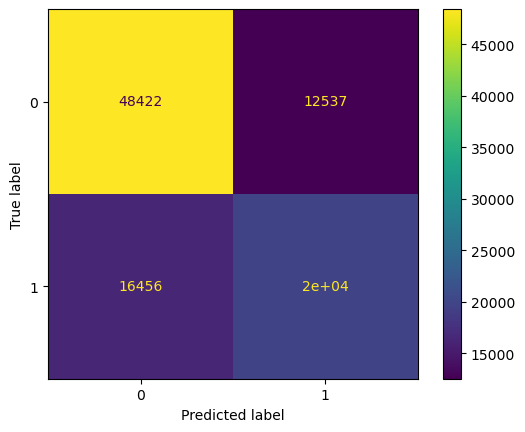

In [44]:
# predictions
y_pred = best_rf.predict(x_test_norm)

# create confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)

# plot confusion matrix
metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot()
# plt.savefig("cm-sent_length.png")
plt.show()

In [45]:
# accuracy, precision, recall scores
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7022480564427511
Precision: 0.6141867979689183
Recall: 0.5480859010270775


### Models Based on TF-IDF

#### Load Libraries

In [46]:
import string
import nltk
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [47]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gillian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Preprocessing

In [48]:
# function to remove any newline tags
def remove_tags(text):
    tags = ['\n\n', '\n', '\'']
    for tag in tags:
            text = text.replace(tag, '')
    return text

# remove tags from text using function
df1['text'] = df1['text'].apply(remove_tags)

In [49]:
# function to remove punctuation
def remove_punc(text):
    new_text = [x for x in text if x not in string.punctuation]
    new_text = ''.join(new_text)
    return new_text

# remove punction from text using function
df1['text'] = df1['text'].apply(remove_punc)

In [50]:
# function to remove stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_words= ' '.join(filtered_words)
    return filtered_words
# remove stopwords from text data
df1['text'] = df1['text'].apply(remove_stopwords)

#### Test/Train Split

In [51]:
# redefining x and y variables
x = df1['text']
y = df1['generated']
# create test and train data
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, train_size = 0.80)

In [52]:
# abbreviated test/train data sets for intial model selection
x_train2 = x_train[:80000]
x_test2 = x_test[:20000]
y_train2 = y_train[:80000]
y_test2 = y_test[:20000]

#### Baseline Dummy Classifier

In [53]:
# create pipeline
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer()),
    ('tfidf_transformer', TfidfTransformer()),
    ('dummy', DummyClassifier())])
# train dummy model
pipeline.fit(x_train, y_train)
# accuracy score
dummy.score(x_test, y_test)

0.6260359647951691

#### Random Forest Classifier

In [54]:
# create pipeline
rf_pipe = Pipeline([
    ('count_vectorizer', CountVectorizer()),
    ('tfidf_transformer', TfidfTransformer()),
    ('rf', RandomForestClassifier())])
# train pipeline
rf_pipe.fit(x_train2, y_train2)

Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('tfidf_transformer', TfidfTransformer()),
                ('rf', RandomForestClassifier())])

In [55]:
# accuracy on train data
print("Train Score:", rf_pipe.score(x_train2, y_train2))
# accuracy on test data
print("Test Score:", rf_pipe.score(x_test2, y_test2))

Train Score: 1.0
Test Score: 0.9892


In [56]:
# predicted y value
y_pred_rf = rf_pipe.predict(x_test2)
# accuracy, precision, recall scores
accuracy = metrics.accuracy_score(y_test2, y_pred_rf)
precision = metrics.precision_score(y_test2, y_pred_rf)
recall = metrics.recall_score(y_test2, y_pred_rf)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9892
Precision: 0.9978234253843015
Recall: 0.973457199734572


#### Support Vector Machine

In [57]:
# create pipeline
svc_pipe = Pipeline([
    ('count_vectorizer', CountVectorizer()),
    ('tfidf_transformer', TfidfTransformer()),
    ('svc', SVC())])
# train pipeline
svc_pipe.fit(x_train2[:8000], y_train2[:8000])

Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('tfidf_transformer', TfidfTransformer()), ('svc', SVC())])

In [58]:
# accuracy on train data
print("Train Score:", svc_pipe.score(x_train2[:8000], y_train2[:8000]))
# accuracy on test data
print("Test Score:", svc_pipe.score(x_test2[:2000], y_test2[:2000]))

Train Score: 0.998625
Test Score: 0.9785


In [59]:
# predicted y value
y_pred_svc = svc_pipe.predict(x_test[:2000])
# acuuracy, precision, recall score
accuracy = metrics.accuracy_score(y_test[:2000], y_pred_svc)
precision = metrics.precision_score(y_test[:2000], y_pred_svc)
recall = metrics.recall_score(y_test[:2000], y_pred_svc)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9785
Precision: 0.9818417639429312
Recall: 0.9631043256997456


#### Naive Bayes

In [60]:
# create pipeline
nb_pipe = Pipeline([
    ('count_vectorizer', CountVectorizer()),
    ('tfidf_transformer', TfidfTransformer()),
    ('nb', MultinomialNB())])
# train pipeline
nb_pipe.fit(x_train2, y_train2)

Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('tfidf_transformer', TfidfTransformer()),
                ('nb', MultinomialNB())])

In [61]:
# accuracy on train data
print("Train Score:", nb_pipe.score(x_train2, y_train2))
# accuracy on test data
print("Test Score:", nb_pipe.score(x_test2, y_test2))

Train Score: 0.945175
Test Score: 0.9372


In [62]:
# predicted y value
y_pred_nb = nb_pipe.predict(x_test2)
# accuracy, precision, recall scores
accuracy = metrics.accuracy_score(y_test2, y_pred_nb)
precision = metrics.precision_score(y_test2, y_pred_nb)
recall = metrics.recall_score(y_test2, y_pred_nb)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9372
Precision: 0.9893998441153546
Recall: 0.8423357664233576


#### Random Forest Classifier on Unabbreviated Train/Test Data

In [64]:
# train rf pipeline on unabbreviated data
rf_pipe.fit(x_train, y_train)

Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('tfidf_transformer', TfidfTransformer()),
                ('rf', RandomForestClassifier())])

In [65]:
# accuracy on train data
print("Train Score:", rf_pipe.score(x_train, y_train))
# accuracy on test data
print("Test Score:", rf_pipe.score(x_test, y_test))

Train Score: 0.9999871626999409
Test Score: 0.9985930391381594


In [66]:
# predicted values
y_pred_rf2 = rf_pipe.predict(x_test)
# accuracy, precision, recall scores
accuracy = metrics.accuracy_score(y_test, y_pred_rf2)
precision = metrics.precision_score(y_test, y_pred_rf2)
recall = metrics.recall_score(y_test, y_pred_rf2)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9985930391381594
Precision: 0.9995043097513288
Recall: 0.9967320261437909


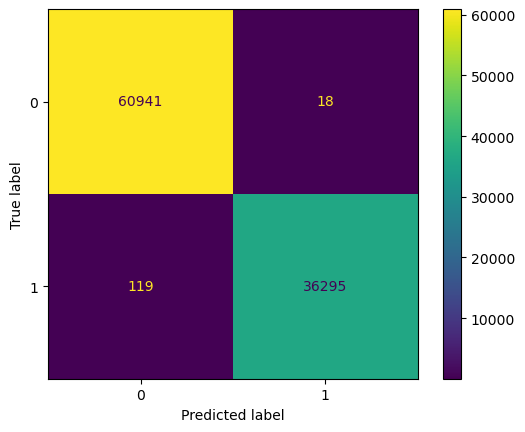

In [67]:
# create confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_rf2)

# plot confusion matrix
metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot()
# plt.savefig("cm-tfidf.png")
plt.show()

Models based on sentence length/variation trained much faster, with decent accuracy scores but poor recall and precision scores. The TF-IDF models took far longer to train, but were much more accurate and scored higher in recall and precision as well. 